In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [143]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [144]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [145]:
df['Age'].mean()

29.69911764705882

In [146]:
df.fillna(df['Age'].mean(),inplace=True)
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [147]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train


,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\2079542218.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


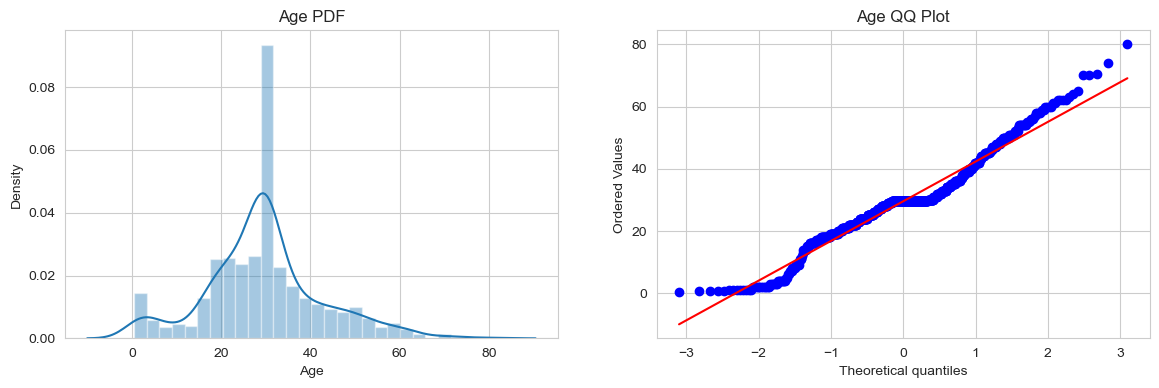

In [149]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1833957494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


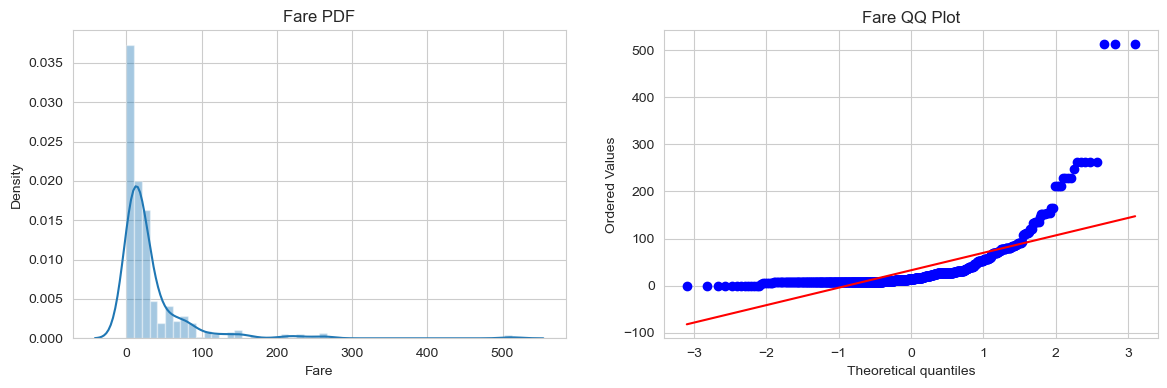

In [150]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# Without transformation

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [152]:
lr.fit(X_train,y_train)
dtc.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_dtc))

0.6480446927374302
0.6759776536312849


# Using transformation (for both fare and age)

### 1. Log Transform

In [153]:
from sklearn.preprocessing import FunctionTransformer
log_trf = FunctionTransformer(func=np.log1p)

In [154]:
X_train_log_trf = log_trf.fit_transform(X_train)
X_test_log_trf = log_trf.transform(X_test)

In [155]:
lr_logTrf = LogisticRegression()
dtc_logTrf = DecisionTreeClassifier()

In [156]:
lr_logTrf.fit(X_train,y_train)
dtc_logTrf.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
y_pred_lr_logTrf = lr_logTrf.predict(X_test)
y_pred_dtc_logTrf = dtc_logTrf.predict(X_test)

In [158]:
print(accuracy_score(y_test,y_pred_lr_logTrf))
print(accuracy_score(y_test,y_pred_dtc_logTrf))

0.6480446927374302
0.6759776536312849


#####  Cross Val Score

In [159]:
from sklearn.model_selection import cross_val_score
X_transformed = log_trf.fit_transform(X)
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
print(np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(dtc,X_transformed,y,scoring='accuracy',cv=10)))

0.678027465667915
0.6655680399500624


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\2291867730.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\2291867730.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function 

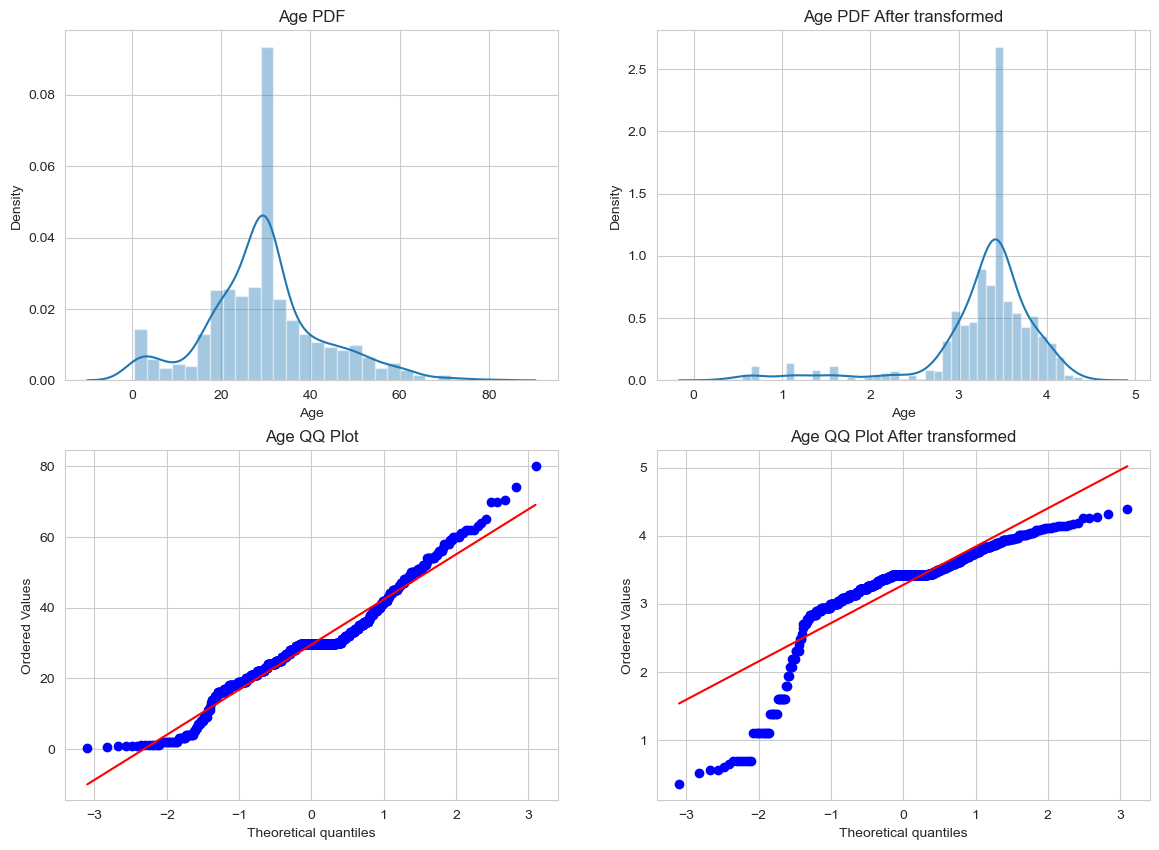

In [160]:
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.distplot(X_train['Age'])
plt.title('Age PDF')


plt.subplot(222)
sns.distplot(X_train_log_trf['Age'])
plt.title('Age PDF After transformed')


plt.subplot(223)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.subplot(224)
stats.probplot(X_train_log_trf['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot After transformed')


plt.show()

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\2788982819.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\2788982819.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

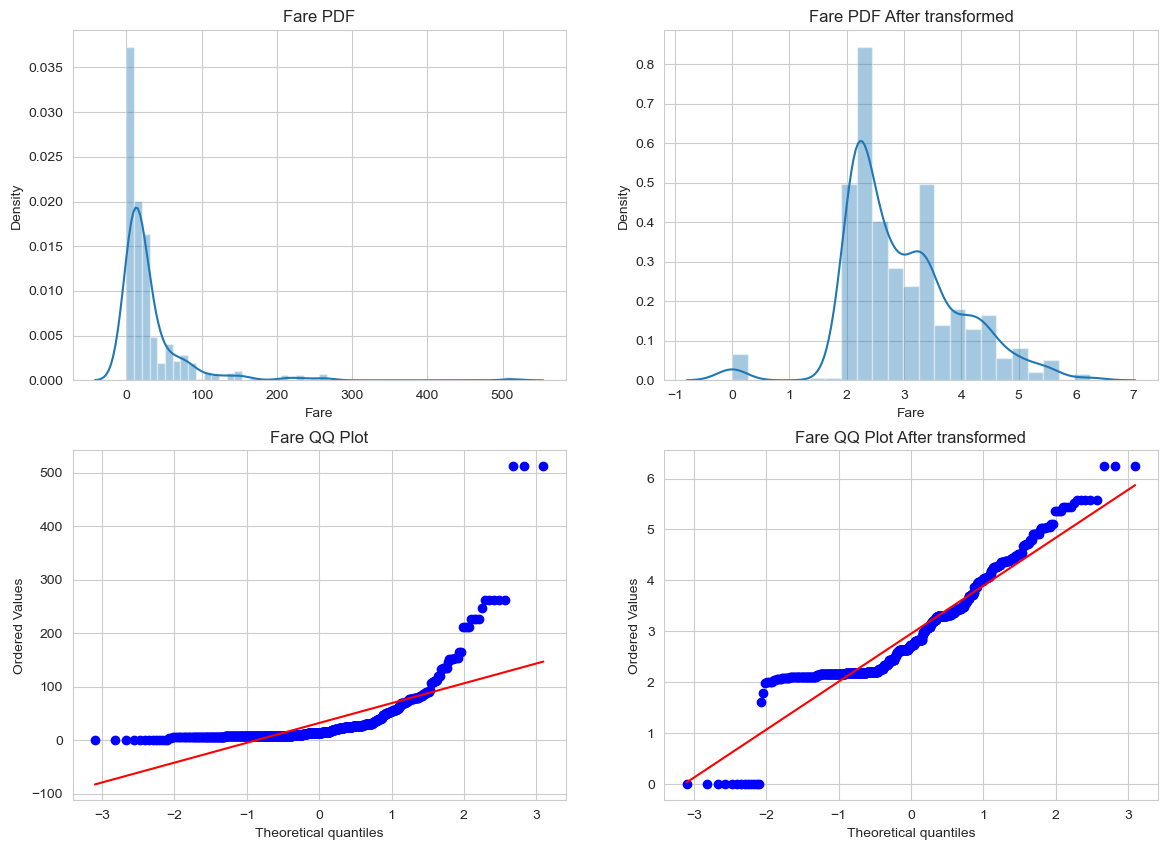

In [161]:
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')


plt.subplot(222)
sns.distplot(X_train_log_trf['Fare'])
plt.title('Fare PDF After transformed')


plt.subplot(223)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.subplot(224)
stats.probplot(X_train_log_trf['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot After transformed')


plt.show()

# Only for fare

In [162]:
from sklearn.compose import ColumnTransformer
log_trf2 = ColumnTransformer([
    ('only_fare_trf',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [163]:
X_train_log_trf2 = log_trf2.fit_transform(X_train)
X_test_log_trf2 = log_trf2.transform(X_test)

In [164]:
lr_logTrf2 = LogisticRegression()
dtc_logTrf2 = DecisionTreeClassifier()

In [165]:
lr_logTrf2.fit(X_train, y_train)
dtc_logTrf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
y_pred_lr_logTrf2 = lr_logTrf2.predict(X_test)
y_pred_dtc_logTrf2 = dtc_logTrf2.predict(X_test)

In [167]:
print(accuracy_score(y_test, y_pred_lr_logTrf2))
print(accuracy_score(y_test, y_pred_dtc_logTrf2))

0.6480446927374302
0.659217877094972


In [168]:
X_transformed2 = log_trf2.fit_transform(X)
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
print(np.mean(cross_val_score(lr, X_transformed, y, scoring='accuracy', cv=10)))
print(np.mean(cross_val_score(dtc, X_transformed, y, scoring='accuracy', cv=10)))

0.678027465667915
0.6599750312109863


In [169]:
def apply_transform(transform_method):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([
        ('trf',FunctionTransformer(transform_method),['Fare'])
    ],remainder='passthrough')
    
    X_trns = trf.fit_transform(X)
    
    clf = LogisticRegression()
    print(np.mean(cross_val_score(clf,X_trns,y,scoring='accuracy',cv=10)))
    
    
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    sns.distplot(X['Fare'])
    plt.title('Fare PDF')


    plt.subplot(222)
    sns.distplot(X_trns[:,0])
    plt.title('Fare PDF After transformed')
    
    
    plt.subplot(223)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare QQ Plot')
    
    plt.subplot(224)
    stats.probplot(X_trns[:,0], dist="norm", plot=plt)
    plt.title('Fare QQ Plot After transformed')
     
    plt.show()

0.6589013732833957


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

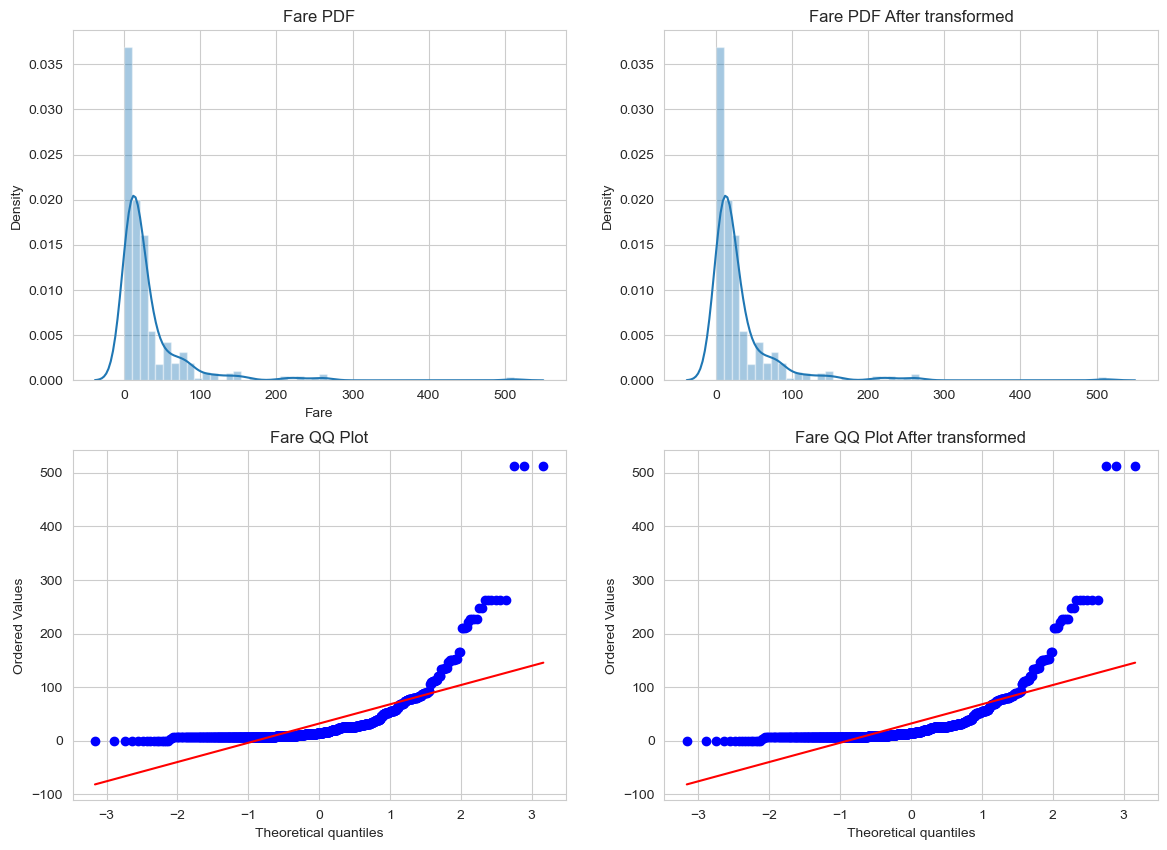

In [170]:
apply_transform(lambda x:x)

0.6442446941323345


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

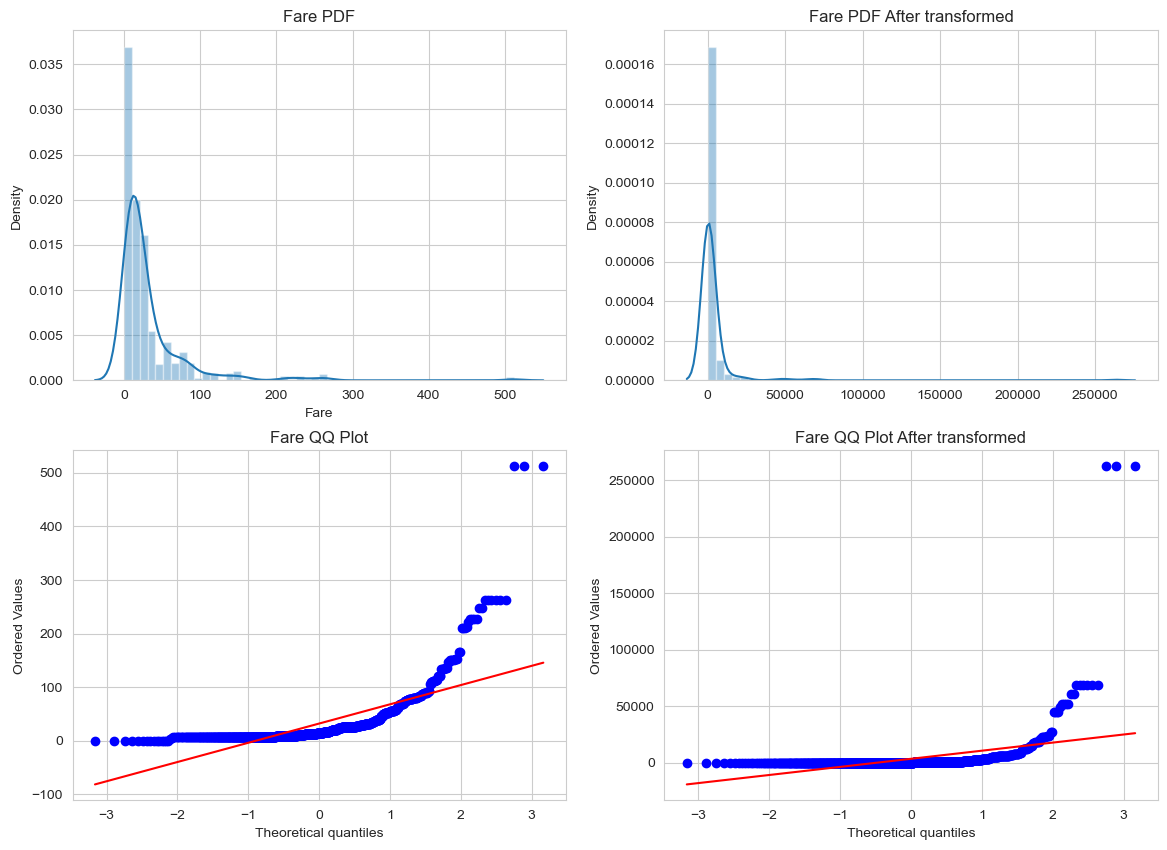

In [171]:
apply_transform(lambda x:x**2)

0.6589013732833957


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

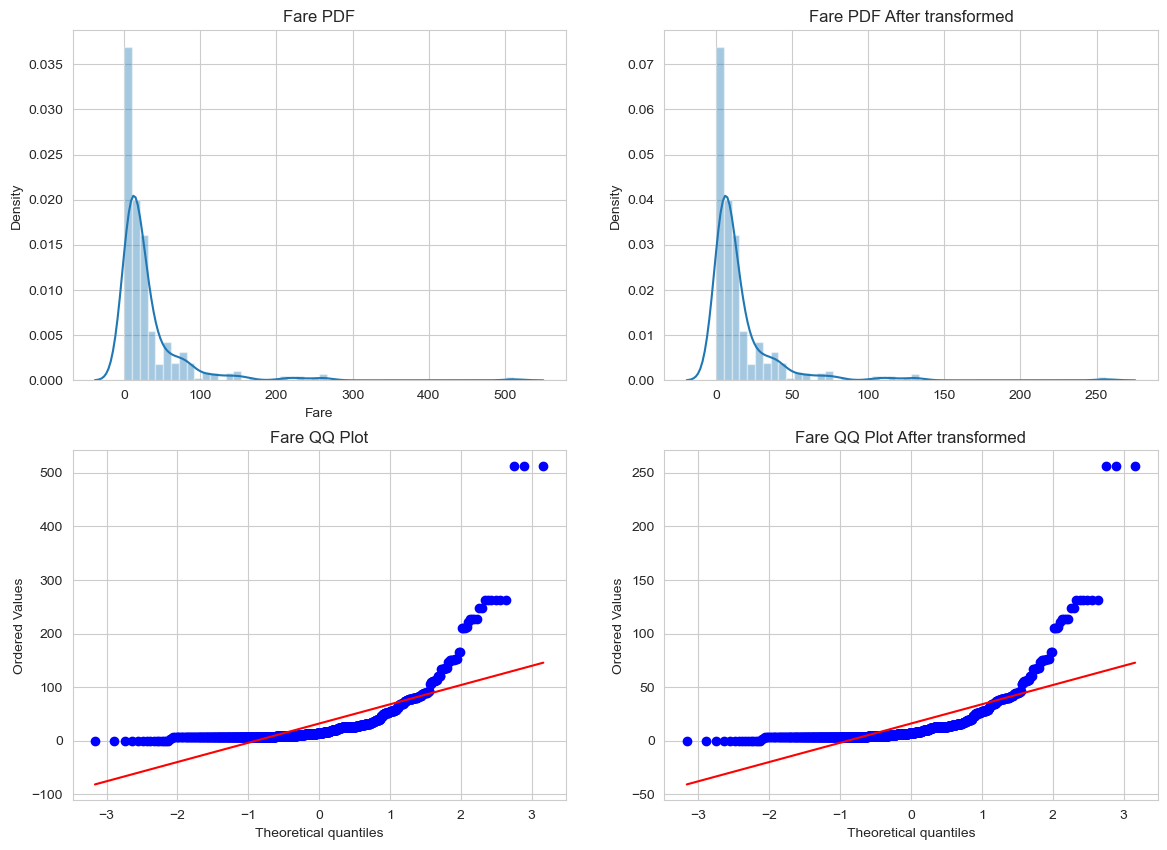

In [172]:
apply_transform(lambda x: x**1/2)

0.61729088639201


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

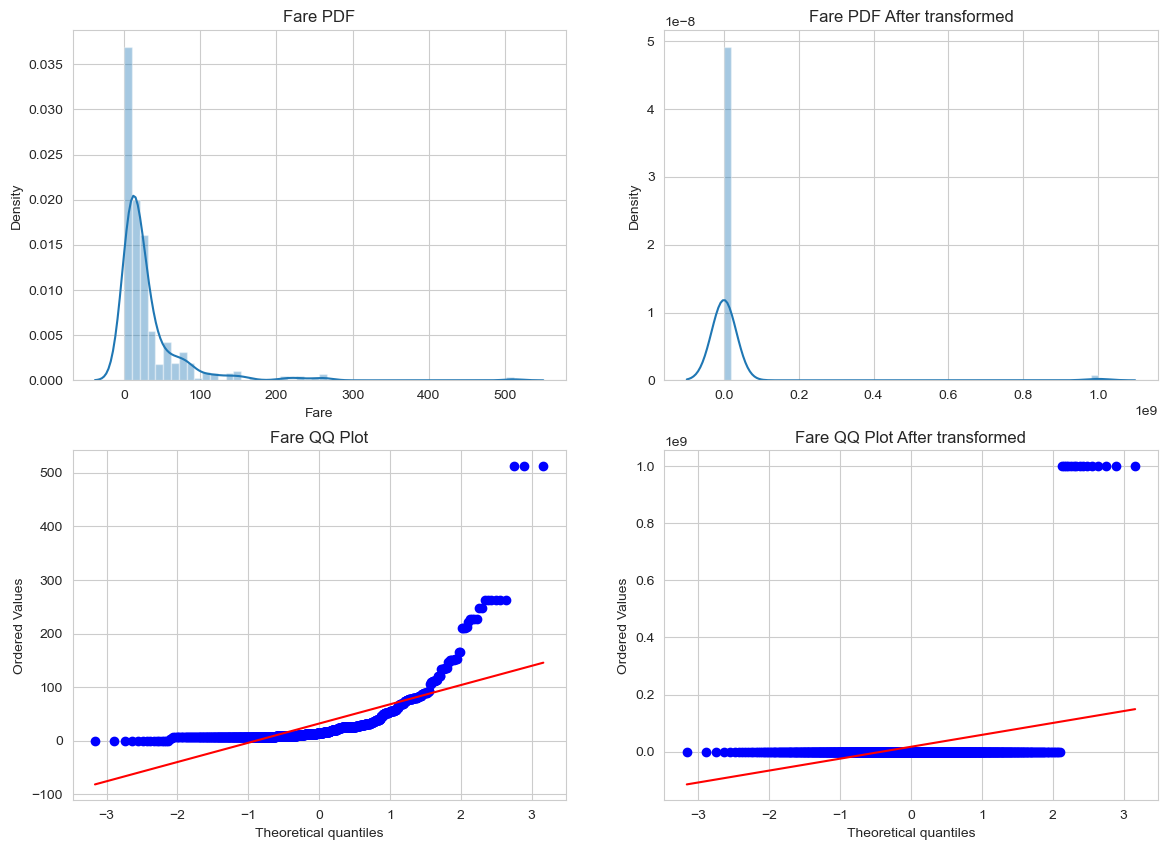

In [173]:
apply_transform(lambda x: 1/(x+0.000000001))

0.6195131086142323


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9936\1898661825.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

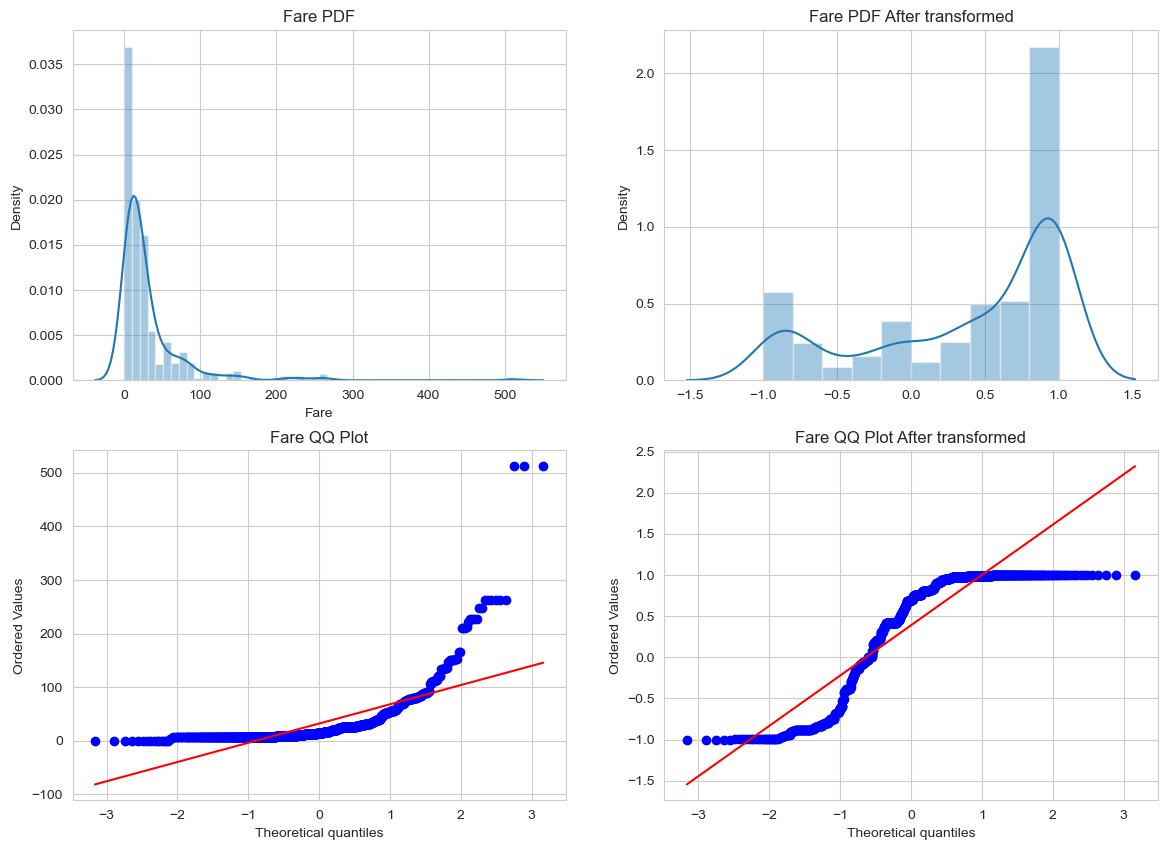

In [174]:
apply_transform(np.sin)